In [35]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import langid

%matplotlib inline

In [64]:
data = pd.read_csv('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/data-full-dd-full.csv')
data['n'] = 1
refdf = pd.read_csv("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/descriptive-full.csv")
refdf = dict(zip(refdf['image'],refdf['pretty_title']))

In [65]:
data['language'] = [langid.classify(str(i))[0] for i in data['sentences']]

In [66]:
df = data[['photo','language','n']].groupby(['photo','language']).sum().reset_index()
df = df.pivot(index='photo',columns='language',values='n').fillna(0)
df.index = [refdf[int(i)] if i != "na" else i for i in df.index]
df.to_csv('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/languages-per-photo.csv')

In [67]:
lan_counts = [[c,int(df[c].sum())] for c in list(df.columns)[1:]]
lan_sel = [[l,c] for l,c in lan_counts if c > 35]
other_lan = [l[0] for l in lan_counts if l[0] not in [x[0] for x in lan_sel]]

In [68]:
data['lan_category'] = ''

for c,i in enumerate(data['language']):
    if i in other_lan:
        data['lan_category'][c] = "other"
    else:
        data['lan_category'][c] = i

/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
data['year'] = ''

for c,i in enumerate(data['date']):
    if i == "na" or "ERR" in str(i):
        data['year'][c] = "na"
    else:
        data['year'][c] = str(i)[0:4]
data['n'] = 1
data = data[~data['year'].isin(['na','nan'])]

/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [76]:
data = data[data['year'].astype(int) > 2000]

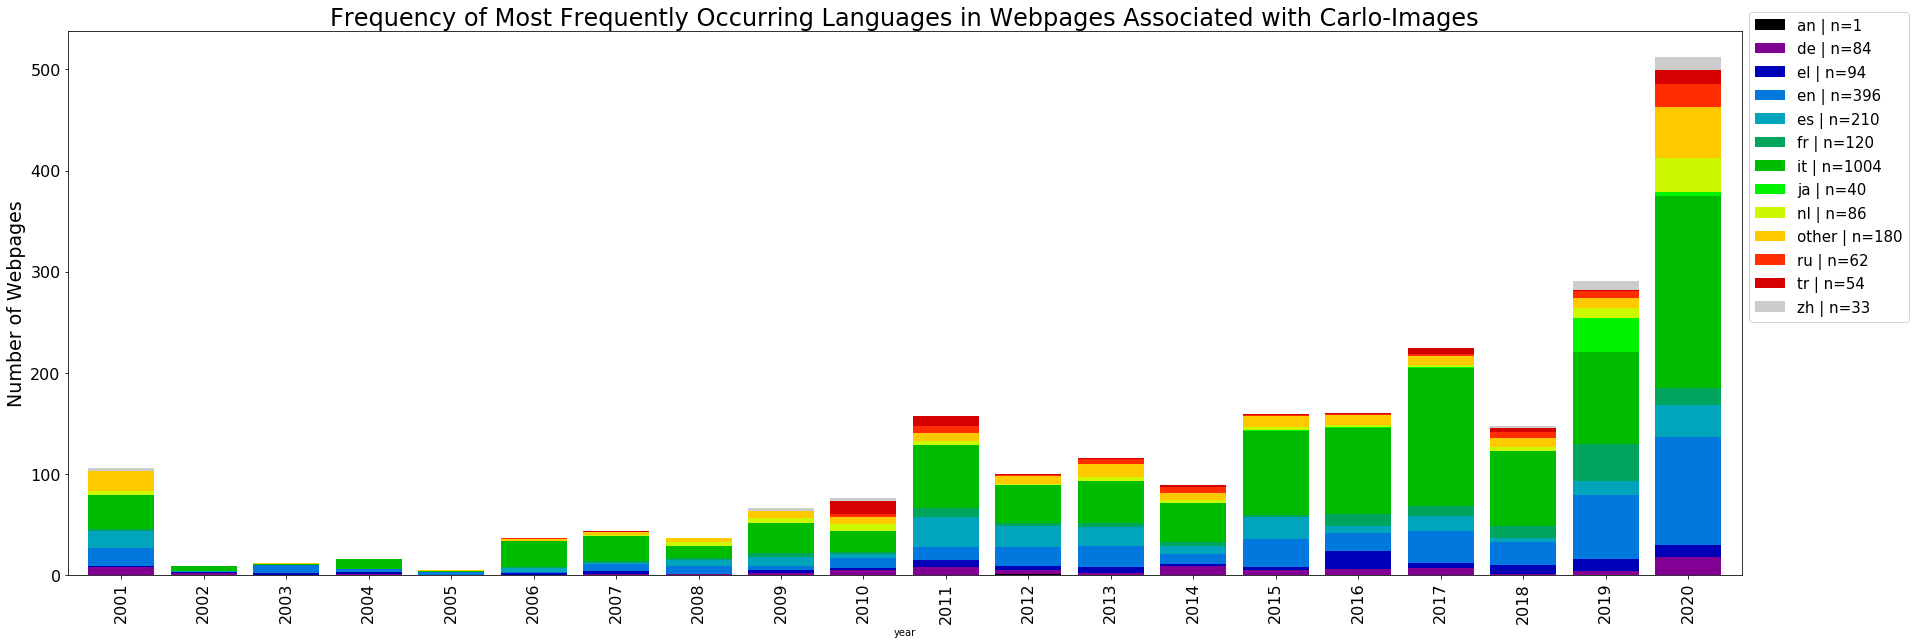

In [78]:
df = data[['lan_category','year','n']].groupby(['lan_category','year']).sum().reset_index()
dfp = df.pivot(index="year",columns="lan_category",values="n").reset_index().fillna(0)
freq_dict = {c:str(int(dfp[c].sum())) for c in list(dfp.columns)[1:]}
dfp.plot.bar(x='year',stacked=True,figsize = (30,10),colormap='nipy_spectral',width=0.8)
plt.legend([c + " | n=" + freq_dict[c] for c in list(dfp.columns)[1:]], loc='upper left', bbox_to_anchor=(1.0, 1.05), fontsize=15)
plt.title('Frequency of Most Frequently Occurring Languages in Webpages Associated with Carlo-Images',size=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Webpages',fontsize=19)
plt.savefig("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/frequency-languages-diachronic.png",dpi=300, bbox_inches='tight')
plt.show()

In [8]:
dfsn = []

for i in dfs.index:
    t = list(dfs.loc[i])
    tsum = sum(t)
    t = [int(round(x / tsum * 100)) for x in t]
    t = [i] + t
    dfsn.append(t)
dfsn = pd.DataFrame(dfsn)
dfsn.index = dfsn.iloc[:,0]
dfsn = dfsn.iloc[:,1:]
dfsn.columns = dfs.columns
dfsn = dfsn.T

In [11]:
from matplotlib import colors
def b_g(s, cmap='GnBu', low=0, high=0):
    # Pass the columns from Dataframe A 
    a = dfsn.loc[:,s.name].copy()
    rng = a.max() - a.min()
    norm = colors.Normalize(a.min() - (rng * low),
                        a.max() + (rng * high))
    normed = norm(a.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]
dfsn2 = dfsn.style.apply(b_g,cmap='summer').to_excel("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/languages-country-colored-c.xlsx", engine="openpyxl")